# **Convolutional Neural Networks (CNN) for Image Recognition**

## **1. Introduction to CNNs for Image Recognition**

**Objective**: This notebook demonstrates how to create a CNN to perform image classification. We'll build, train, and evaluate a CNN using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains 60,000 32x32 color images of 10 different classes (e.g., airplane, automobile, bird, cat).

**Libraries**:
- `TensorFlow/Keras`: For building, training, and evaluating the CNN model.
- `Matplotlib`: For visualizing data and model performance.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## **2. Understanding Convolutional Neural Networks**

### **2.1. CNN Layers and Architecture**
- **Convolutional Layer**: Detects features by applying filters (kernels) across the input image.
- **Pooling Layer**: Reduces dimensionality, preserving key features.
- **Fully Connected Layer**: Processes and classifies the detected features.

### **2.2. Visualizing Convolution Operations**

Convolutions are achieved by sliding a kernel (small matrix) over the image and calculating a weighted sum, which enhances specific features such as edges or textures.

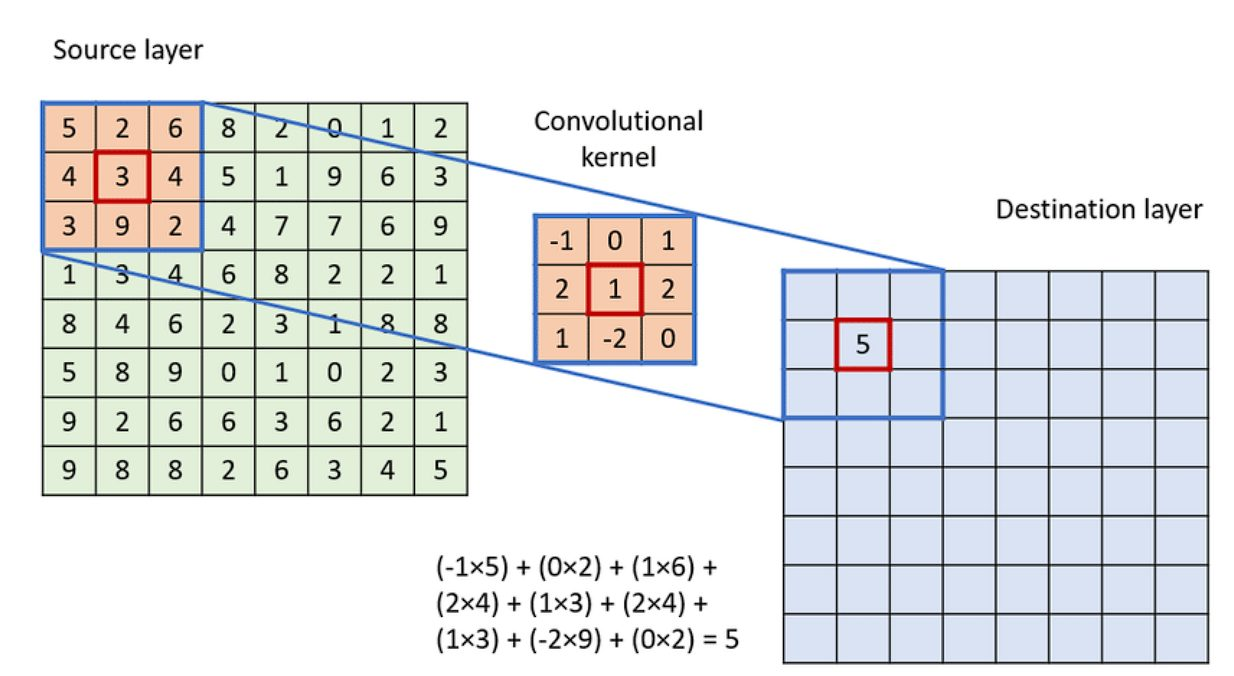

> Image source: https://www.researchgate.net/figure/Schematic-illustration-of-a-convolutional-operation-The-convolutional-kernel-shifts-over_fig2_332190148

## **3. Dataset Preparation**

The CIFAR-10 dataset contains 60,000 images in 10 classes, with 50,000 training images and 10,000 test images.

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


### **3.1. Visualizing the Data**

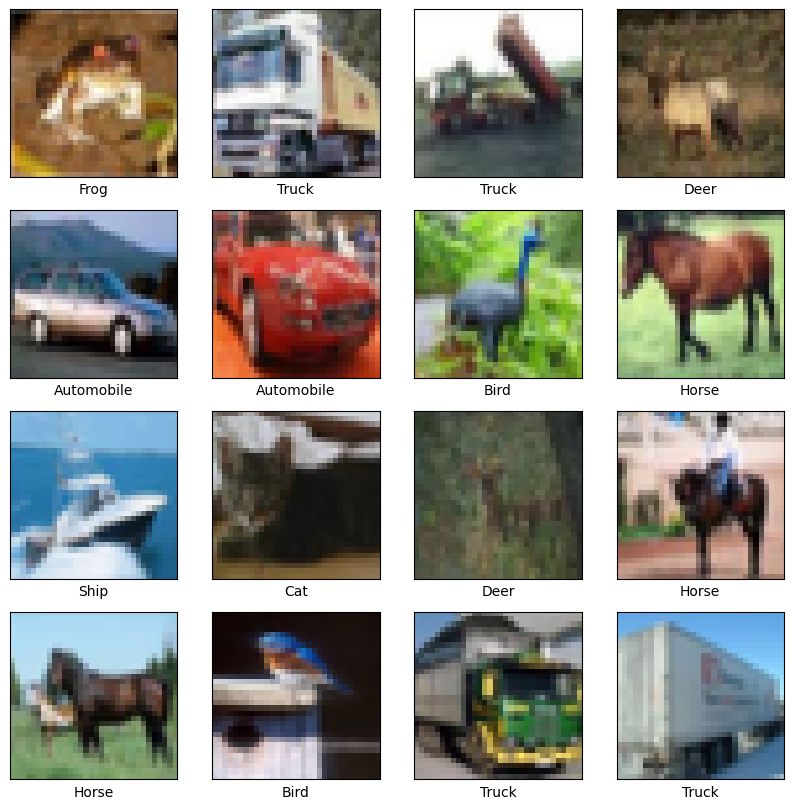

In [3]:
# Display a few sample images from the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

## **4. Building the CNN Model**

Here, we’ll design a CNN with multiple convolutional and pooling layers followed by dense layers.

In [4]:
# Initialize the model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes

# Model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

## **5. Compiling and Training the Model**

### **5.1. Compile the Model**

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **5.2. Train the Model**

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/20


I0000 00:00:1730144761.516279      69 service.cc:145] XLA service 0x7f6850004910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730144761.516344      69 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 55/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1477 - loss: 2.2653

I0000 00:00:1730144765.264168      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2905 - loss: 1.9042 - val_accuracy: 0.5068 - val_loss: 1.3847
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4930 - loss: 1.4051 - val_accuracy: 0.5635 - val_loss: 1.1925
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5673 - loss: 1.2215 - val_accuracy: 0.6283 - val_loss: 1.0634
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6118 - loss: 1.1005 - val_accuracy: 0.6575 - val_loss: 0.9702
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6536 - loss: 0.9927 - val_accuracy: 0.6776 - val_loss: 0.9230
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6779 - loss: 0.9188 - val_accuracy: 0.6942 - val_loss: 0.8800
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6938 - loss: 0.8835 - val_accuracy: 0.7002 - val_loss: 0.8609
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7141 - loss: 0.8208 - val_accuracy: 0.7042 - val

### **5.3. Plotting Training and Validation Performance**

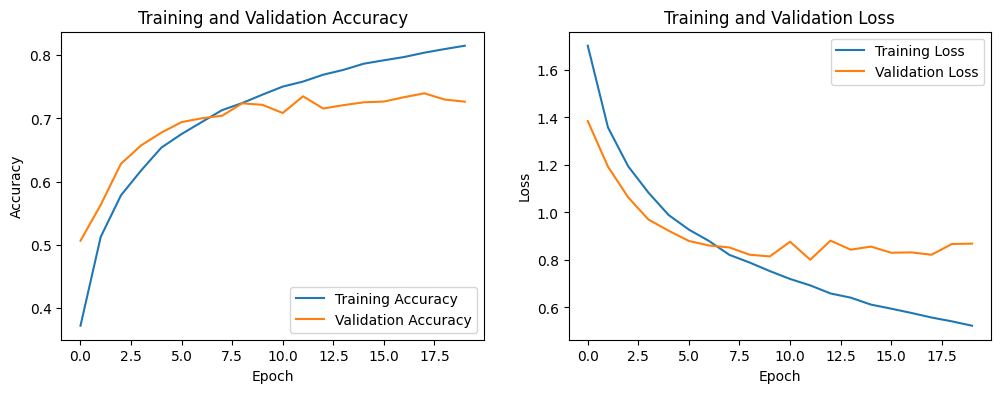

In [7]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## **6. Evaluating Model Performance**

### **6.1. Evaluate on Test Data**

In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7282 - loss: 0.8578
Test Accuracy: 0.7264


### **6.2. Confusion Matrix and Classification Report**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


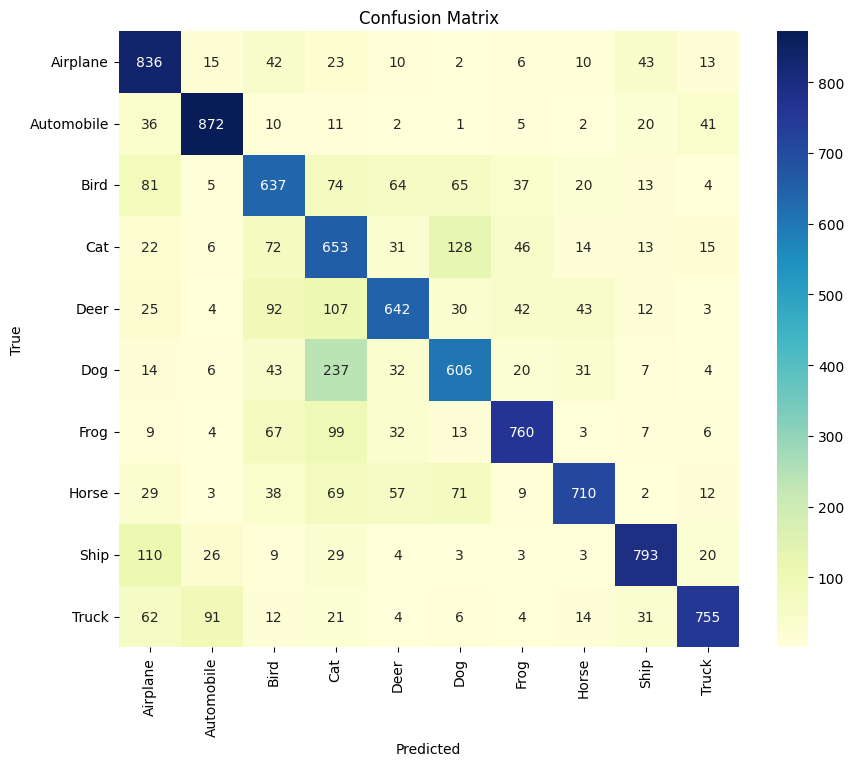

              precision    recall  f1-score   support

    Airplane       0.68      0.84      0.75      1000
  Automobile       0.84      0.87      0.86      1000
        Bird       0.62      0.64      0.63      1000
         Cat       0.49      0.65      0.56      1000
        Deer       0.73      0.64      0.68      1000
         Dog       0.66      0.61      0.63      1000
        Frog       0.82      0.76      0.79      1000
       Horse       0.84      0.71      0.77      1000
        Ship       0.84      0.79      0.82      1000
       Truck       0.86      0.76      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get model predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

## **7. Making Predictions**

Let's visualize some predictions and see if the model correctly identifies the classes.

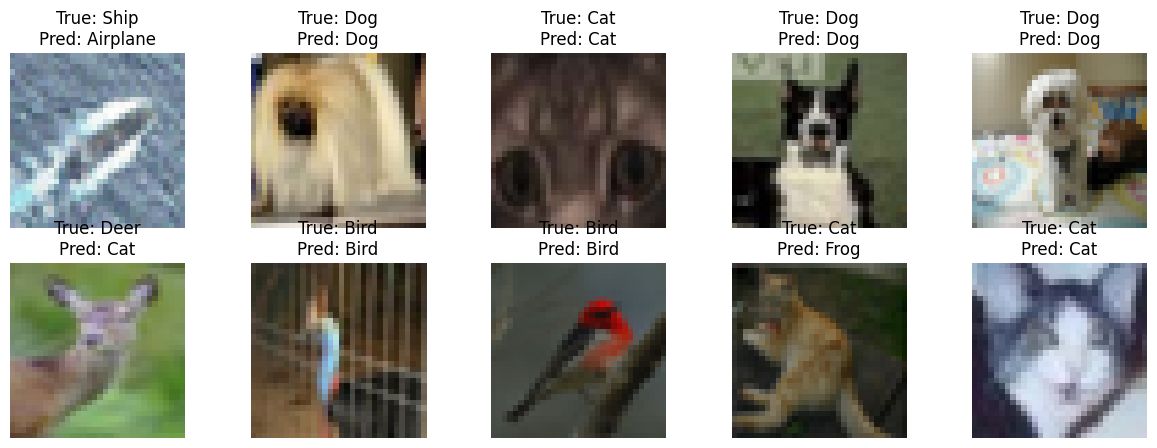

In [10]:
# Select some test images
n_images = 10
indices = np.random.choice(len(X_test), n_images)
sample_images = X_test[indices]
sample_labels = y_true[indices]
predictions = y_pred[indices]

# Plot images with predictions
plt.figure(figsize=(15, 5))
for i in range(n_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.show()

## **8. Summary and Conclusion**

In this notebook, we successfully built a CNN model to perform image classification on the CIFAR-10 dataset. Key steps included:

1. Loading and preprocessing the dataset.
2. Building and compiling the CNN model.
3. Training the model and monitoring its performance.
4. Evaluating the model using test data and visualizing predictions.

**What's next?**
- **Data Augmentation**: Use data augmentation to enhance model generalization.
- **Hyperparameter Tuning**: Experiment with model depth, filter sizes, and learning rate.
- **Advanced Architectures**: Explore pre-trained models such as ResNet and VGGNet.